# <center> <span style="color:purple"> Predictive Sales Modeling </span>
### <span style="color:darkblue"> Author </span> 
<span style="color:black"> Leidy Alfonso, lpalfonsoa@gmail.com </span> 
    
### <span style="color:darkblue"> Objetive:  </span>  
+ Understand the Dataset and cleanup if it is required.
    
+ Build Regression models to predict the sales.

### <span style="color:darkblue"> Description:  </span>  
    
<p style="text-align: justify;">  Regression models, such as Multiple Linear Regression (MLR) and Polynomial Regression (PR), play a crucial role in various fields and industries due to their versatility and predictive power. These models are widely used in data analysis, forecasting, and decision-making processes, making them invaluable tools for extracting valuable insights from complex datasets. One of the key strengths of regression models is their ability to establish relationships between dependent and independent variables, providing a clear understanding of how changes in the predictors impact the outcome. In marketing and advertising, for instance, regression models can help optimize advertising budgets by identifying the most influential channels and allocating resources effectively to maximize sales or customer engagement. </p>
    
<p style="text-align: justify;">   One of the primary uses of regression models is in the domain of business and marketing. By applying MLR and Polynomial Regression to datasets containing sales, advertising budgets, and other relevant metrics, companies can gain valuable insights into the effectiveness of their marketing strategies and optimize resource allocation for maximum returns. These models help businesses predict future sales based on different advertising scenarios, allowing them to make informed decisions to boost revenue and stay competitive in the market. </p>
    
<p style="text-align: justify;">The dataset provided comprises sales revenue data corresponding to advertisement expenditure across various channels such as radio, television, and newspapers. The primary objective is to analyze the influence of advertising budgets on the overall sales performance. In-depth examination of the relationships between different advertising channels and their respective impacts on sales is essential to derive valuable insights and optimize advertising strategies. To accomplish this, we shall employ statistical techniques and machine learning algorithms such as Linear Regression, Principal Component Analysis (PCA), Recursive Feature Elimination (RFE), and Polynomial Regression. Through these methodologies, we aim to identify significant features, address multicollinearity issues, and assess the model's predictive performance using metrics like Root Mean Squared Error (RMSE), R-squared (R2), and cross-validation scores.  </p>

<p style="text-align: justify;">Additionally, we will visualize the data through pair plots, scatter plots, and regression curves, providing a comprehensive understanding of the data distribution and relationships. The primary goal was to build Polynomial and Multiple Linear Regression models to predict sales, evaluate their performance, and determine the better-performing model. After implementing both models, we found that the Polynomial Regression model exhibited superior performance, as evidenced by a remarkable R2-Score of 0.99 on the testing set and a significantly low Mean Squared Error (MSE) of 0.14 on the Training set. The model demonstrates its efficacy in accurately capturing the relationship between advertising budgets and sales.  </p>
    
        
<span style="color:darkblue"> Acknowledgements:  </span>  
This dataset has been referred from Kaggle.

#### <span style="color:black"> Import libraries </span> 

In [172]:
import kaggle
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#### <span style="color:black"> Get data </span> 

In [2]:
! kaggle datasets download -d yasserh/advertising-sales-dataset -p ../Data_sets/

advertising-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
file_dir = '../Data_sets/advertising-sales-dataset.zip'
destination_dir = '../Data_sets/'

with zipfile.ZipFile(file_dir, 'r') as file:
    file.extractall(destination_dir)

In [92]:
df = pd.read_csv('../Data_sets/Advertising Budget and Sales.csv', index_col=0)
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### <span style="color:black"> Understand and clean data </span> 

In [93]:
df.info()
print("\n Unique values per column: ")
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB

 Unique values per column: 


TV Ad Budget ($)           190
Radio Ad Budget ($)        167
Newspaper Ad Budget ($)    172
Sales ($)                  121
dtype: int64

In [94]:
# Check if there are any NaN values in the entire DataFrame
any_nan = df.isnull().values.any()
# Count the number of NaN values in each column
nan_counts = df.isnull().sum()

if any_nan:
    print("The dataset contains NaN values.")
    print("Number of NaN values in each column:")
    print(nan_counts)
else:
    print("The dataset does not contain any NaN values.")

The dataset does not contain any NaN values.


<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;"> The dataset comprises 200 samples and includes four numerical features. It has been thoroughly reviewed, and no missing values or NaN entries have been identified. It is a complete dataset with valid information in all features, ensuring data integrity for the subsequent analysis and modeling. The absence of missing values allows for a reliable and comprehensive examination, facilitating informed decision-making and predictive insights with confidence. </p>

### <span style="color:black"> Exploratory Data Analysis  </span> 

##### <span style="color:black"> Distribution  </span> 

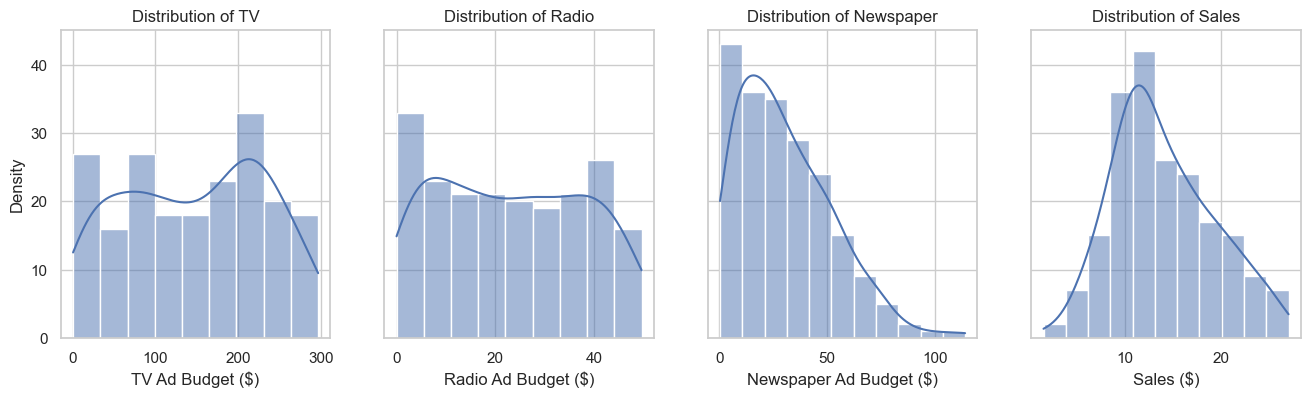

In [95]:
sns.set(style="whitegrid")
num_columns = 4
num_rows = 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4*num_rows), sharey=True)
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data=df[column], kde=True, ax=ax)
    col_name = re.match(r'^\w+', column).group()
    ax.set_title(f"Distribution of {col_name}")
    ax.set_xlabel(column)
    ax.set_ylabel("Density")
    
plt.show()


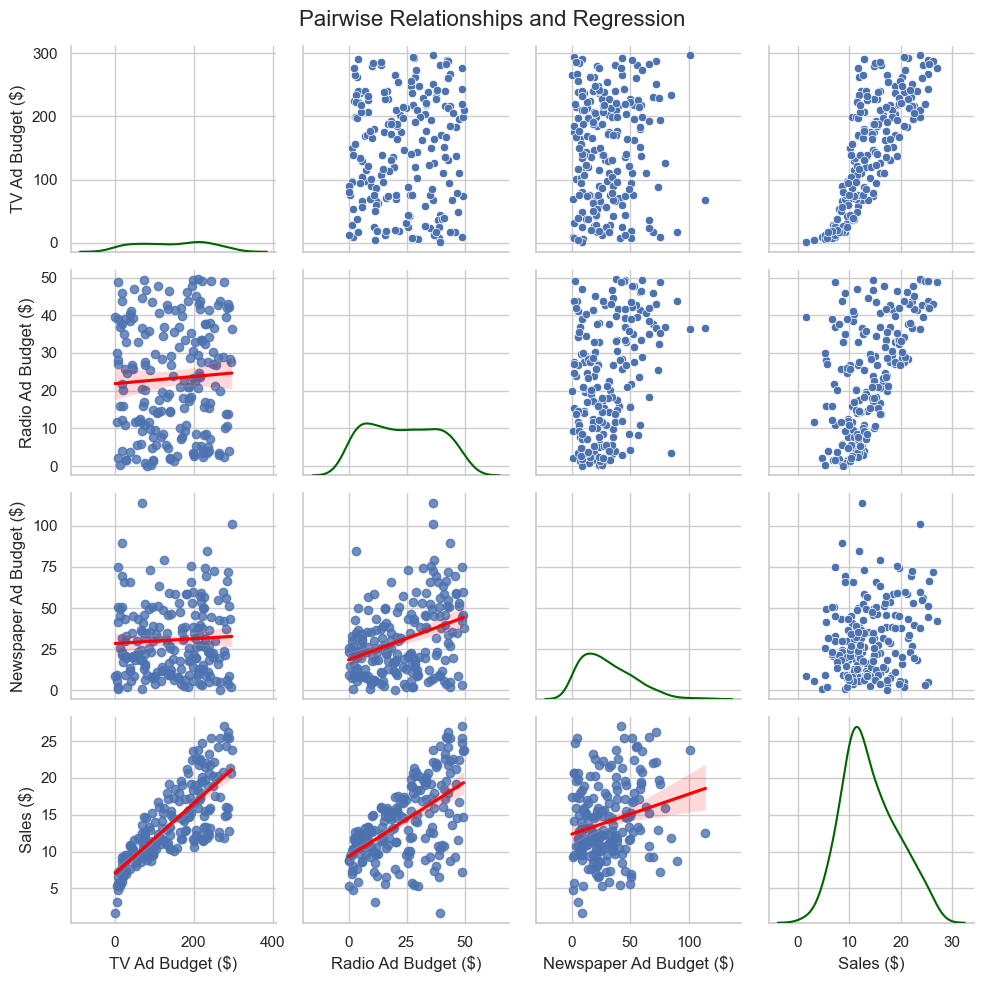

In [116]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot, color='b')
g.map_diag(sns.kdeplot, color='darkgreen')
g.map_lower(sns.regplot, line_kws={'color': 'red'})
g.fig.suptitle('Pairwise Relationships and Regression', fontsize=16)
plt.tight_layout()
plt.show()

##### <span style="color:black"> Correlation </span> 

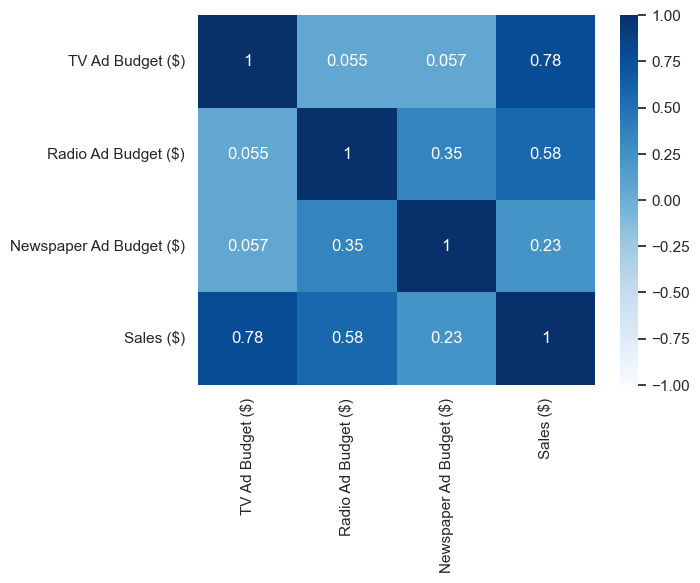

In [9]:
plt.figure()
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap = 'Blues')
plt.show()

##### <span style="color:black"> Outliers </span> 

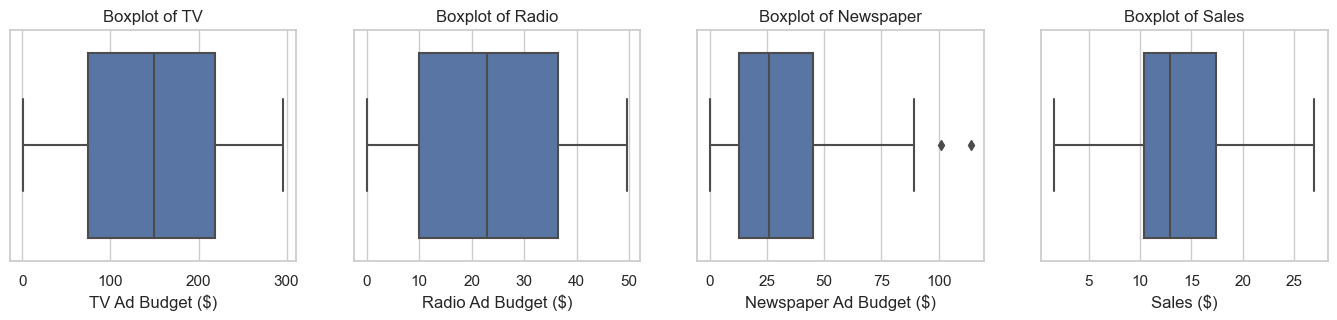

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(17, 3))
fig.subplots_adjust(hspace=0.5)

# Plot the boxplot of each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.boxplot(x=df[column], ax=ax)
    col_name = re.match(r'^\w+', column).group()
    ax.set_title(f"Boxplot of {col_name}")
    ax.set_xlabel(column)
plt.show()


##### <span style="color:black"> Outliers </span> 

In [11]:
z_scores = stats.zscore(df)
threshold = 3 
# Identify all outliers
outlier = df[(z_scores > threshold).any(axis=1)]
print(f"Number of outliers: {len(outlier)}")

Number of outliers: 2


<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;"> Notably, there are two outliers present in the dataset. The target variable, which represents sales, exhibits a relatively normal distribution, centered around approximately $11. Moreover, some features display a linear relationship. Additionally, certain components exhibit elevated correlation values, indicating potential multicollinearity. This makes it challenging to isolate their individual effects on the dependent variable. Multicollinearity can affect the interpretation and stability of regression models, leading to unreliable coefficient estimates and inflated standard errors. Eliminating multicollinearity is of utmost importance in the analysis. This process enhances the interpretability of our results and strengthens the overall robustness of our analysis. Moreover, it facilitates well-informed decision-making by enabling us to discern and understand the unique contributions of each predictor variable to the outcome. </p>

### <span style="color:black"> Preparing data  </span> 
##### <span style="color:black"> Remove outliers </span> 

In [12]:
outlier_mask = (z_scores > threshold).any(axis=1)
df_filtered = df[~outlier_mask]
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)
print(f"The percentage removed is: {round((1 - df_filtered.shape[0] / df.shape[0]) * 100, 2)}%")

Original DataFrame shape: (200, 4)
Filtered DataFrame shape: (198, 4)
The percentage removed is: 1.0%


In [13]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),198.0,146.688384,85.443221,0.7,74.800,149.75,218.475,293.6
Radio Ad Budget ($),198.0,23.130808,14.862111,0.0,9.925,22.40,36.325,49.6
Newspaper Ad Budget ($),198.0,29.777273,20.446303,0.3,12.650,25.60,44.050,89.4
Sales ($),198.0,13.980808,5.196097,1.6,10.325,12.90,17.375,27.0


##### <span style="color:black"> Scaler </span> 

In [14]:
target = df_filtered[df_filtered.columns[3]]

In [15]:
df_filtered = df_filtered.drop(df_filtered.columns[3], axis=1)

In [16]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns)
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),198.0,-1.984944e-16,1.002535,-1.712932,-0.843491,0.035923,0.842297,1.723765
Radio Ad Budget ($),198.0,2.691450e-17,1.002535,-1.560306,-0.890808,-0.049297,0.890024,1.785499
Newspaper Ad Budget ($),198.0,1.794300e-16,1.002535,-1.445347,-0.839794,-0.204822,0.699829,2.923456


In [17]:
X=data_scaled
y=target

##### <span style="color:black"> Correct multi-correlation </span> 

Best number of features: 2
Best score: 0.8877746326163092


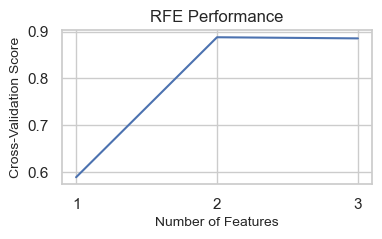

In [18]:
# Define the range of numbers of features to consider
num_features_range = range(1, len(X.columns) + 1)
scores = []
best_score  = 0.0

for num_features in num_features_range:
    estimator = LinearRegression()  
    rfe = RFE(estimator, n_features_to_select=num_features)
    X_selected = rfe.fit_transform(X, y)
    
    # Perform cross-validation and compute the mean score
    cv_scores = cross_val_score(estimator, X_selected, y, cv=5)
    mean_score = np.mean(cv_scores)
    
    scores.append(mean_score)
    
    if mean_score > best_score:
        best_score = mean_score
        best_num_features = num_features

print(f"Best number of features: {best_num_features}")
print(f"Best score: {best_score}")


plt.figure(figsize=(4, 2)) 
plt.plot(num_features_range, scores)
plt.xlabel('Number of Features', fontsize=10)
plt.ylabel('Cross-Validation Score', fontsize=10)
plt.title('RFE Performance')
plt.xticks(num_features_range)
plt.grid(True)
plt.show()

Explained Variance Ratio:
[0.45357168 0.32855213]
Cumulative Explained Variance Ratio:
[0.45357168 0.78212381]


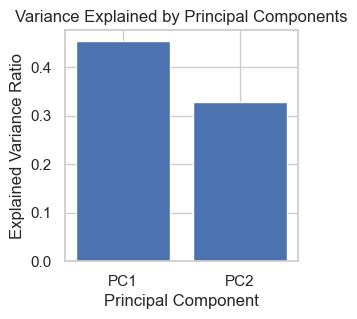

In [19]:
# Apply PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance)

plt.figure(figsize=(3, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=['PC1', 'PC2'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.show()


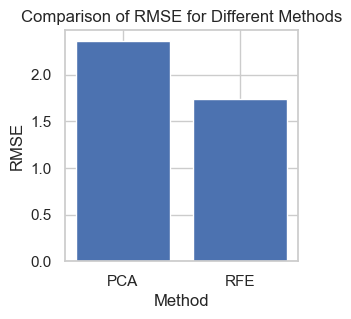

In [125]:
rmse_values = []
method_names = []
lr = LinearRegression()

# Principal Component Analysis (PCA)
X_scaled = X
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)
pca_predictions = cross_val_predict(lr, X_pca, y, cv=5)
pca_rmse = np.sqrt(mean_squared_error(y, pca_predictions))
rmse_values.append(pca_rmse)
method_names.append('PCA')

# Recursive Feature Elimination (RFE)
rfe = RFE(lr, n_features_to_select=2)  
X_rfe = rfe.fit_transform(X, y)
rfe_predictions = cross_val_predict(lr, X_rfe, y, cv=5)
rfe_rmse = np.sqrt(mean_squared_error(y, rfe_predictions))
rmse_values.append(rfe_rmse)
method_names.append('RFE')

# Plot the RMSE values
plt.figure(figsize=(3, 3))
plt.bar(method_names, rmse_values)
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Methods')
plt.show()

In [22]:
#Set up rfe data
X_rfe = pd.DataFrame(data=X_rfe, columns=['C1', 'C2'])
print(X_rfe)

           C1        C2
0    0.978697  0.989521
1   -1.199012  1.090705
2   -1.519332  1.535913
3    0.056456  1.225616
4    0.400243 -0.831784
..        ...       ...
193 -1.272932 -1.310720
194 -0.615864 -1.229773
195  0.355657 -0.932968
196  1.606431  1.272836
197  1.002164 -0.980187

[198 rows x 2 columns]


<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;">
Approximately 1.0% of the dataset was removed to eliminate outliers. The data was standardized using StandardScaler to optimize model performance. Notably, the 'TV' feature had a relatively higher maximum value compared to the other features. </p>

<p style="text-align: justify;">
In addressing multicollinearity, two methods were utilized: Dimension reduction with PCA and Recursive Feature Elimination (RFE). Employing cross-validation, it was determined that including 2 features in the RFE model produced the best result, yielding a cross-validation score close to 1. 
Regarding PCA, 2 principal components were selected for evaluation, resulting in explained variance ratios of 0.45 and 0.32 for each component.  This shows that the first principal component explains approximately 45.36% of the variance, and the second principal component explains around 32.86% of the variance. The first two principal components explain approximately 78.21% of the variance, that is a significant amount.
Upon assessing the models, the Root Mean Squared Error (RMSE) for PCA was 2.36, while RFE achieved an RMSE of 1.74. Consequently, RFE emerged as the preferred option, showcasing superior performance for this specific analysis.</p>



## <span style="color:black"> Models  </span> 
##### <span style="color:black"> Split data </span> 


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, target, train_size=0.8, test_size=0.2, random_state=0)

In [223]:
def plot_prediction(prediction):
    rc=np.random.choice(X_train.columns,2)
    plt.figure(figsize=(17,4))
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=y_train, x=X_train[i], label='Data', c='salmon')
        plt.scatter(y=prediction, x=X_train[i], label='Prediction')
        plt.legend()
    plt.show()

def plot_metrics(predictions_train, predictions_test):
    print('Training Set Metrics:')
    r2_train = round(r2_score(y_train, predictions_train), 2)
    rss_train = round(np.sum(np.square(y_train - predictions_train)), 2)
    mse_train = round(mean_squared_error(y_train, predictions_train), 2)
    print(f'R2-Score = {r2_train}')
    print(f'Residual Sum of Squares (RSS) = {rss_train}')
    print(f'Mean Squared Error (MSE) = {mse_train}')

    print('\nTesting Set Metrics:')
    r2_test = round(r2_score(y_test, predictions_test), 2)
    rss_test = round(np.sum(np.square(y_test - predictions_test)), 2)
    mse_test = round(mean_squared_error(y_test, predictions_test), 2)
    print(f'R2-Score = {r2_test}')
    print(f'Residual Sum of Squares (RSS) = {rss_test}')
    print(f'Mean Squared Error (MSE) = {mse_test}')

#### <span style="color:black">  Multiple linear Regression </span> 

In [205]:
MLR = LinearRegression().fit(X_train, y_train)
ypredic_train_MLR = MLR.predict(X_train)
ypredic_test_MLR = MLR.predict(X_test)
print(f'Coeffecient 1: {MLR.coef_[0]} \nCoeffecient 2: {MLR.coef_[1]} \nIntercept: {MLR.intercept_} ')

Coeffecient 1: 3.8190386821069695 
Coeffecient 2: 2.8397775669813012 
Intercept: 13.901989016700952 


Training Set Metrics:
R2-Score = 0.89
Residual Sum of Squares (RSS) = 468.02
Mean Squared Error (MSE) = 2.96

Testing Set Metrics:
R2-Score = 0.92
Residual Sum of Squares (RSS) = 91.27
Mean Squared Error (MSE) = 2.28


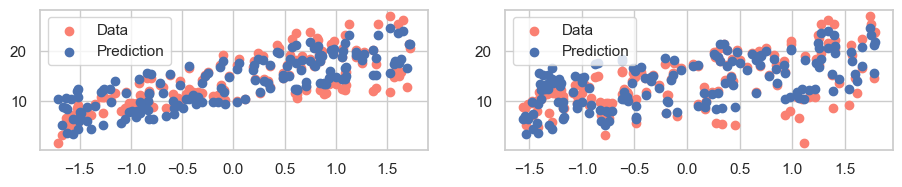

In [224]:
plot_metrics(ypredic_train_MLR, ypredic_test_MLR)
plot_prediction(ypredic_train_MLR)

#### <span style="color:black">  Polynomial Regression Model </span> 

Best Degree: 6


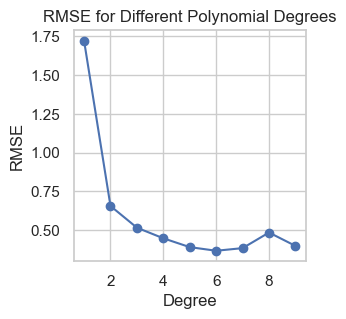

In [234]:
#Seeking the optimal degree value.
degrees = range(1, 10) 
rmse_values = []

for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X_train)
    PR = LinearRegression()
    PR.fit(X_poly, y_train)
    pred1 = PR.predict(X_poly)
    rmse = np.sqrt(mean_squared_error(y_train, pred1))
    rmse_values.append(rmse)
    best_degree_index = np.argmin(rmse_values)
    best_degree = degrees[best_degree_index]
print("Best Degree:", best_degree)
    
plt.figure(figsize=(3, 3))
plt.plot(degrees, rmse_values, marker='o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE for Different Polynomial Degrees')
plt.grid(True)
plt.show()


Training Set Metrics:
R2-Score = 0.99
Residual Sum of Squares (RSS) = 31.72
Mean Squared Error (MSE) = 0.2

Testing Set Metrics:
R2-Score = 0.99
Residual Sum of Squares (RSS) = 5.48
Mean Squared Error (MSE) = 0.14


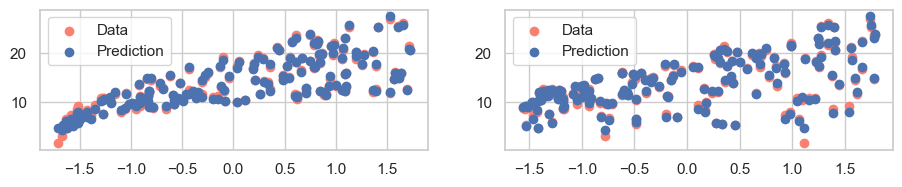

In [225]:
# Apply Polynomial
poly_reg = PolynomialFeatures(degree=4)
X_train_PR = poly_reg.fit_transform(X_train)
X_test_PR = poly_reg.fit_transform(X_test)
PR = LinearRegression()
PR.fit(X_train_PR, y_train)

ypredic_train_PR = PR.predict(X_train_PR)
ypredic_test_PR = PR.predict(X_test_PR)

plot_metrics(ypredic_train_PR, ypredic_test_PR)
plot_prediction(ypredic_train_PR)

In [231]:
def plot_Error(pred_train_1, pred_train_2, pred_test_1, pred_test_2, y_train, y_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Calculate the error for each method on the training set
    error1_train = y_train - pred_train_1
    error2_train = y_train - pred_train_2
    
    # Calculate the error for each method on the testing set
    error1_test = y_test - pred_test_1
    error2_test = y_test - pred_test_2
    
    # Plot the error distribution for both methods on the training set
    sns.kdeplot(data=error1_train, label='MLR (Train)', color='blue', fill=True, ax=ax1)
    sns.kdeplot(data=error2_train, label='PR (Train)', color='green', fill=True, ax=ax1)
    
    # Plot the error distribution for both methods on the testing set
    sns.kdeplot(data=error1_test, label='MLR (Test)', color='red', fill=True, ax=ax2)
    sns.kdeplot(data=error2_test, label='PR (Test)', color='orange', fill=True, ax=ax2)
    
    ax1.set_xlabel('Error')
    ax1.set_ylabel('Density')
    ax1.set_title('Error Distribution - Training Set')
    ax1.legend()
    ax1.grid(True)
    
    ax2.set_xlabel('Error')
    ax2.set_ylabel('Density')
    ax2.set_title('Error Distribution - Testing Set')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

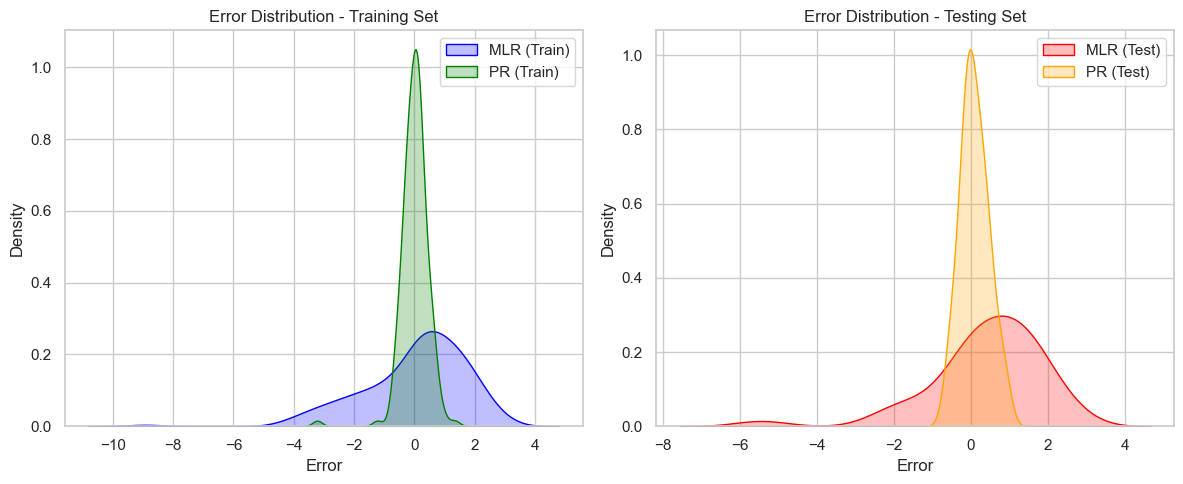

In [233]:
plot_Error(ypredic_train_MLR, ypredic_train_PR, ypredic_test_MLR, ypredic_test_PR, y_train, y_test)

<p style="text-align: justify;"> Two regression methods, Multiple Linear Regression (MLR) and Polynomial Regression, were implemented to predict the values of the target variable, "Sales." In MLR, the relationship between the target variable and multiple predictor variables (TV Ad Budget, Radio Ad Budget, Newspaper Ad Budget) was modeled using a linear equation. On the other hand, Polynomial Regression extends the concept of linear regression by introducing polynomial features, allowing the model to capture non-linear relationships between the target variable and predictors. In this case, the degree of the polynomial was set to 4, enabling the model to capture complex interactions between the features and the target variable. Both methods were evaluated to determine the best performing model for predicting "Sales" accurately. </p>

<p style="text-align: justify;">  For the PR method, the value of the "degree" parameter was estimated by considering the RMSE on the training data. It was observed that the RMSE follows a decreasing convex curve up to degree 8, reaching its lowest point at degree 6. However, upon testing the model with degree equal to 4, better scores were observed for the metrics considered. As a result, a degree value of 4 was used for the analysis. </p>

The table presents the performance metrics of two regression models: Multiple Linear Regression (MLR) and Polynomial Regression (PR). Both models were evaluated on both the training and testing datasets. 

| Model | Set   | R2-Score | Residual Sum of Squares (RSS) | Mean Squared Error (MSE) |
|-------|-------|----------|------------------------------|-------------------------|
| MLR   | Train | 0.89     | 468.02                       | 2.96                    |
| PR    | Train | 0.99     | 31.72                        | 0.2                     |
| MLR   | Test  | 0.92     | 91.27                        | 2.28                    |
| PR    | Test  | 0.99     | 5.48                         | 0.14                    |

<p style="text-align: justify;"> 
The R2-Score, which indicates the goodness of fit, is 0.89 for the training set and 0.92 for the testing set in the MLR model. In contrast, the PR model achieves a higher R2-Score of 0.99 for both the training and testing sets, signifying that it explains a very high percentage (around 99%) of the variance in the target variable.</p>
<p style="text-align: justify;"> 
Regarding the Residual Sum of Squares (RSS), the MLR model exhibits a higher value of 468.02 for the training set and 91.27 for the testing set. In contrast, the PR model yields lower values of 31.72 for the training set and 5.48 for the testing set. The RSS measures the total squared error between the predicted and actual values, and lower values indicate better model performance. In this case, the PR model outperforms the MLR model, particularly in the testing set. </p>
<p style="text-align: justify;"> 
As for the Mean Squared Error (MSE), the MLR model shows higher values of 2.96 for the training set and 2.28 for the testing set. In comparison, the PR model achieves lower MSE values of 0.2 for the training set and 0.14 for the testing set. The MSE is another measure of the model's accuracy, and lower values are preferred. The lower MSE values in the PR model further support its higher accuracy compared to the MLR model. </p>

### Conclusions

<p style="text-align: justify;">  It is worth noting that the dataset was carefully examined, and no missing values or NaN entries were identified, ensuring data integrity for the analysis. Outliers were removed to avoid undue influence on the modeling process. StandardScaler was employed to normalize the data and enhance model performance.Additionally, the evaluation of multicollinearity through dimension reduction with PCA and Recursive Feature Elimination (RFE) revealed that the RFE method was more effective in handling multicollinearity and selecting the most relevant features. </p>

<p style="text-align: justify;"> Based on the analysis conducted, it can be concluded that both Multiple Linear Regression (MLR) and Polynomial Regression (PR) models were employed to predict sales based on advertising budgets. The PR model, which incorporates polynomial features, outperformed the MLR model in terms of accuracy and predictive performance.  The R2-Score indicated that the PR model explained approximately 99% of the variance in the target variable for both the training and testing sets. This is a remarkable achievement, signifying a high level of predictive power.</p>

<p style="text-align: justify;"> In this case, both the Multiple Linear Regression (MLR) and Polynomial Regression models demonstrate exceptional predictive capabilities for "Sales." The high R2-Score values for the MLR and Polynomial Regression models indicate that a significant proportion of the variance in "Sales" can be accurately explained by the predictor variables. This highlights the power and potential of regression methods in the business world. By effectively predicting sales based on advertising budgets across different media channels, these models empower businesses to make data-driven decisions, optimize marketing strategies, and allocate resources more effectively. The robust predictive performance of regression models holds great promise for businesses seeking to enhance their decision-making processes, gain deeper insights into customer behavior, and achieve competitive advantages in the market. </p>


<p style="text-align: justify;"> Looking ahead, expanding the dataset size would be advantageous to further enhance the performance and generalization capabilities of the regression models. The current dataset comprises only 200 samples, which, while providing valuable insights, may still present limitations in capturing the full complexity of real-world scenarios. With a larger dataset, the models could better learn and generalize from more diverse patterns and relationships This would lead to more robust and accurate predictions, enabling businesses to make more informed decisions and gain deeper insights into their advertising strategies.  </p>